In [32]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Plottings of training and validation results and losses

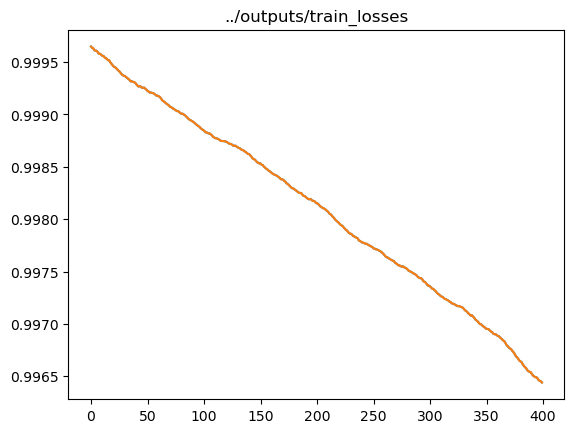

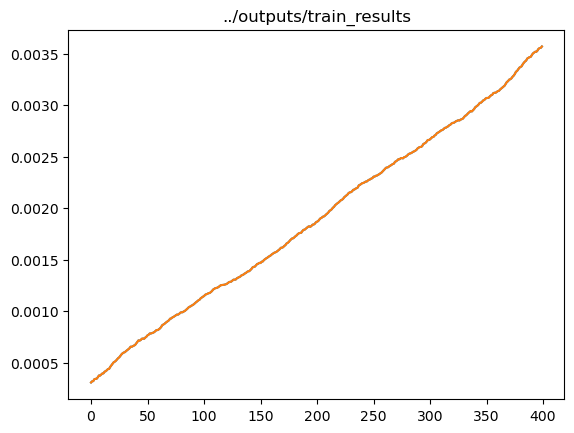

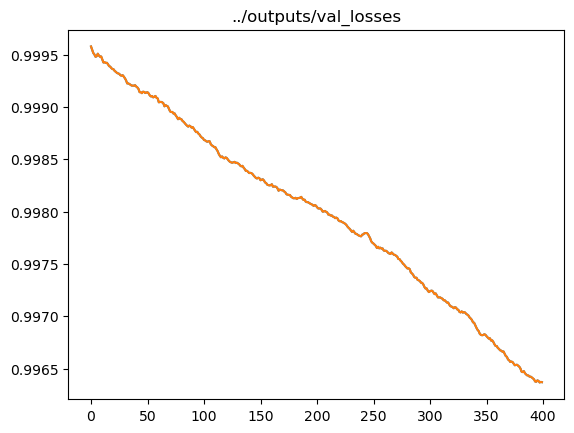

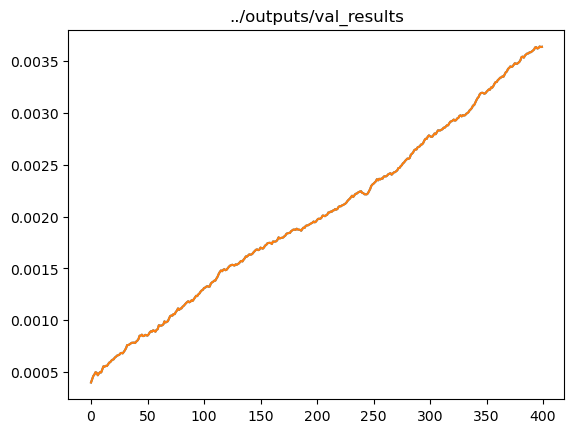

In [42]:
# Load the pickle file
def ma(a, window_size=100):
    return [np.mean(a[i:i+window_size], axis = 0) for i in range(0,len(a)-window_size)]

def ploting(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
        plot_data = ma(data) if len(data)>100 else data
        plt.plot(range(len(plot_data)),plot_data)
        plt.plot(plot_data)
        plt.title(file.name)
        plt.show()
    
ploting('../outputs/train_losses')
ploting('../outputs/train_results')
ploting('../outputs/val_losses')
ploting('../outputs/val_results')

In [27]:
in_dims = [7, 300]
# Resize it to make sure it is 32x32
image = np.random.rand(32, 32)    
# Convert the image to an array
image_array = np.array(image)
# Extract the RGB values

# Calculate the average RGB values
avg_rgb = np.mean(image, axis=(0, 1))

# Create a trigonometric correlation using the average RGB values
x = np.linspace(0, 2 * np.pi, in_dims[1])
print(x.shape)

output_matrix = np.empty((in_dims[0], in_dims[1]))
print(output_matrix.shape)
for i in range(in_dims[1]):
    output_matrix[i, :] = np.sin(x + avg_rgb)

print(output_matrix)

(300,)
(7, 300)


IndexError: index 7 is out of bounds for axis 0 with size 7

Printing selection arrays

In [ ]:
with open('../outputs/train_selection.pickle', 'rb') as file:
    print('train_selection')
    data = pickle.load(file)
    print(data)
with open('../outputs/val_selection.pickle', 'rb') as file:
    print('val_selection')
    data = pickle.load(file)
    print(data)

Loading Cifar100 and creating labels array

In [ ]:

# Load CIFAR-100 dataset
from torchvision import datasets

cifar100 = datasets.CIFAR100(root='./cifar100data', train=True, download=True)
cifar100_lables = []
for i in range(len(cifar100)):
    cifar100_lables.append(cifar100[i][1])
cifar100_lables = np.array(cifar100_lables)
print(len(cifar100_lables))


Show specific image in Cifar / specific label

In [ ]:

loc = np.where(cifar100_lables==17)[0][40-1]
print(cifar100[loc][1])
plt.imshow(cifar100[loc][0])
plt.axis('off')  # Disable axis
plt.show()


arr = np.where(cifar100_lables==61)[0]
i=0
for location in arr:
    print(i)
    i+=1
    plt.imshow(cifar100[location][0])
    plt.axis('off')  # Disable axis
    plt.show()

Conversion Fucntion from Unity's stupidity to normal sequensing. 

In [ ]:
def conv_alph_to_num(num):
    if num<2 or num>89:
        return num
    units = num%10
    tens = num//10
    if (units - tens) == 1:
        return units
    temp = tens*10 + tens + 1
    if (num > temp):
        temp += 11
    return num + (10 - temp%10)

Printing participant's image set in the event order

In [ ]:

simset = 32

if simset == 32 :
    # SHL
    labels= [83,80,58,44,1,52,9,29,46,14,6,23,69,91,54,5,76,78,62,70,50,90,13,56,95,21,82,11,43,65,71,51,34,12,8,66,79,63,72,24,10,67,27,77,41,49,17,53,18,98,92,47,26,25,7,31,59,20,42,89,48,68,32,86,81,37,85,87,39,97,4,16,75,94,0,93,57,40,74,88,30,33,99,38,3,64,36,15,73,19,84,28,96,2,35,55,22,61,60,45,75,14,97,29,69,24,69,64,25,43,62,12,87,43,40,27,9,21,83,63,56,69]

if simset == 52 :
    # AEI
    labels = [46,48,12,41,47,69,0,39,95,98,57,64,49,7,77,18,51,56,8,36,9,71,20,58,42,62,19,72,66,79,55,94,87,78,63,14,4,89,3,91,37,33,31,70,35,25,27,1,86,22,26,5,10,15,99,54,21,34,68,24,96,45,75,43,97,84,11,13,29,17,53,76,90,50,88,30,2,82,93,73,85,28,81,23,16,74,32,60,61,83,38,6,40,92,44,80,52,67,59,65,1,56,98,18,22,76,86,12,40,23,34,33,38,12,86,82,14,62,79,11,28,36]

if simset == 40 :
    # AM
    labels = [79,93,9,33,47,95,43,90,96,56,30,66,77,17,80,31,41,58,7,42,12,24,85,82,72,87,61,99,53,74,71,55,6,40,25,37,2,91,36,44,13,27,0,89,68,21,57,26,45,32,29,23,54,49,86,92,3,88,14,67,70,60,11,10,16,4,18,39,69,38,48,76,15,59,8,81,73,62,75,35,65,98,84,46,63,5,94,51,64,20,97,52,1,78,22,50,28,83,19,34,12,50,2,6,68,22,6,72,13,82,69,21,73,48,28,26,28,87,13,11,42,81]

labels = [conv_alph_to_num(num) for num in labels]
for lbl in labels:
    loc = np.where(cifar100_lables==lbl)[0][simset-1]
    # Display the image
    print(cifar100[loc][1])
    plt.imshow(cifar100[loc][0])
    plt.axis('off')  # Disable axis
    plt.show()

